# 8. Hafta Lab-3: Recurrent Neural Networks
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak


In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import preprocessing
from keras.layers.embeddings import Embedding
import numpy as np
from keras.utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


#### IMDB veri kümesini kullan.

In [2]:
# En cok kullanılan kelime sayısı
max_features = 10000
# 100 kelimeden sonra yorumları kes
maxlen = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
X_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [4]:
print("X_train.shape :",np.matrix(X_train[2]).shape)

X_train.shape : (1, 100)


In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, SimpleRNN, Dropout

### Modeli oluştur

In [6]:
model = Sequential()
model.add(Embedding(10000, maxlen))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,010,625
Trainable params: 1,010,625
Non-trainable params: 0
_________________________________________________________________


In [7]:
# plot_model(model, show_shapes=True, to_file="srnn.png")
# Image("srnn.png")

In [8]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.6817 - acc: 0.5551 - val_loss: 0.6556 - val_acc: 0.6277
Epoch 2/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.5826 - acc: 0.7418 - val_loss: 0.5071 - val_acc: 0.7753
Epoch 3/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.4344 - acc: 0.8357 - val_loss: 0.5932 - val_acc: 0.6795
Epoch 4/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.3053 - acc: 0.9035 - val_loss: 0.5791 - val_acc: 0.6977
Epoch 5/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.2230 - acc: 0.9360 - val_loss: 0.4542 - val_acc: 0.7981
Epoch 6/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.1350 - acc: 0.9717 - val_loss: 0.4337 - val_acc: 0.8130
Epoch 7/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.1028 - acc: 0.9777 - val_loss: 0.5620 - val_acc

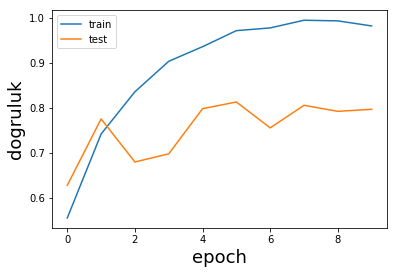

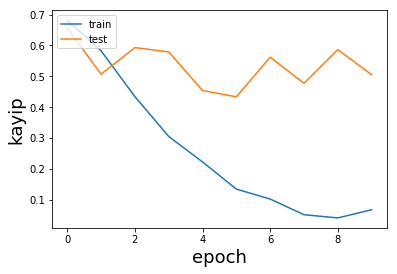

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Deep Model

In [10]:
model = Sequential()
model.add(Embedding(10000, maxlen))
model.add(SimpleRNN(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          4256      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [11]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 41s 3ms/step - loss: 0.7260 - acc: 0.5339 - val_loss: 0.7273 - val_acc: 0.5123
Epoch 2/10
15000/15000 [==============================] - 39s 3ms/step - loss: 0.6426 - acc: 0.6414 - val_loss: 0.5504 - val_acc: 0.7293
Epoch 3/10
15000/15000 [==============================] - 38s 3ms/step - loss: 0.5029 - acc: 0.7642 - val_loss: 0.4439 - val_acc: 0.8037
Epoch 4/10
15000/15000 [==============================] - 40s 3ms/step - loss: 0.3799 - acc: 0.8341 - val_loss: 0.5979 - val_acc: 0.7101
Epoch 5/10
15000/15000 [==============================] - 37s 2ms/step - loss: 0.2670 - acc: 0.8922 - val_loss: 0.6449 - val_acc: 0.7355
Epoch 6/10
15000/15000 [==============================] - 38s 3ms/step - loss: 0.1661 - acc: 0.9407 - val_loss: 0.5825 - val_acc: 0.7756
Epoch 7/10
15000/15000 [==============================] - 37s 2ms/step - loss: 0.0642 - acc: 0.9830 - val_loss: 0.8367 - val_acc

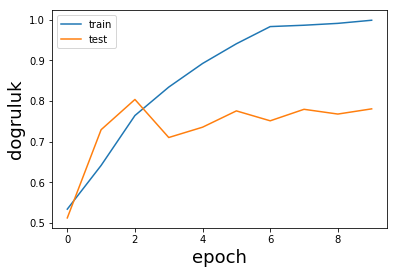

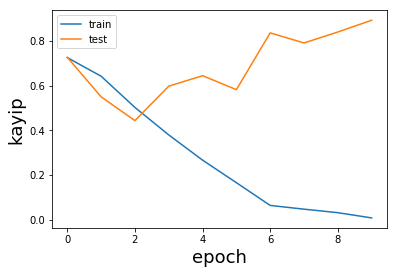

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()